#5. Quiz
> bicycle_out.csv의 이상치를 제거하시오

In [3]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_ori = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/1. 데이터분석을 위한 기초 통계학/1.데이터 클렌징/data/bicycle_out.csv', encoding='CP949')
df = df_ori
df.head()

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120


In [ ]:
df.shape

(420, 12)

In [ ]:
df.describe()

,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,420.000000,396.000000,420.000000,409.000000,405.000000,404.000000,420.000000
mean,243.254762,7.585859,93.338095,2.831296,21.269136,2679.678218,35.445238
std,301.148255,6.258985,26.270667,1.687148,20.237064,3028.272755,31.823039
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.000000,3.000000,101.000000,1.000000,7.000000,1070.000000,24.000000
50%,117.500000,6.000000,101.000000,2.000000,14.000000,1680.000000,29.000000
75%,226.500000,10.000000,101.000000,4.000000,27.000000,3757.500000,40.000000
max,3102.000000,30.000000,101.000000,7.000000,122.000000,42070.000000,533.000000


> 대여거치대, 반납거치대, 이용시간, 이용거리가 다른 feature보다 값이 부족함으로 결측치가 존재한다는것을 알 수 있다.

#1. 이상치 처리하기

> 대여소번호, 대여거치대, 반납대여소번호, 반납거치대 등은, 그 장소의 고유한 값이기 때문에 이상치가 없을것이라 생각하고, 또한 describe를 봤을 때와, 대여소 번호에 따른 대여소명도 여러값이 있는것을 볼때 맞는 정보인것 같다.
 큰 이상은 없는 것 같다.

 > 따라서 이상치를 처리해야 할 곳은 이용시간, 이용거리, 나이 이 세가지 이다.

##1.1 속도
>이용시간은 따릉이 이용 목적에 따라 달라지기도하고, 최대 요금제에따라 2시간이상 이용할 수 있다. 또한 따릉이로 카페나 업무를 보러 이용한 후, 그곳에 놔두고 이동하는 경우가 있기때문에 이동 거리를 이동시간으로 나눠 속도를 봐서 이상치를 검출하도록 하겠다.

> 먼저 새로운 컬럼을 만들어준다.

In [ ]:
df['분당속도'] = df['이용거리']/df['이용시간']

In [ ]:
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이,분당속도
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50,91.666667
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31,202.857143
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32,NaN
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21,138.000000
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120,165.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22,200.000000
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN,22,NaN
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37,190.000000
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27,118.000000


In [ ]:
df.분당속도.describe()

count    389.000000
mean     145.799768
std       74.806722
min        0.000000
25%      102.000000
50%      152.352941
75%      188.181818
max      914.565217
Name: 분당속도, dtype: float64

> 분당속도에서 이상치를 제거한다.

>

In [ ]:
spd_q1 = df.분당속도.describe().loc['25%']
spd_q3 = df.분당속도.describe().loc['75%']
spd_IQR = spd_q3-spd_q1

spd_lower = spd_q1 - spd_IQR*1.5
spd_upper = spd_q3+spd_IQR*3
df[df['분당속도'] < spd_lower]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이,분당속도


In [ ]:
df[df['분당속도'] > spd_upper]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이,분당속도
75,SPB-22668,2019-11-02 16:02,116,일진아이윌아파트 옆,3.0,2019-11-02 16:50,101,(구)합정동 주민센터,4.0,46.0,42070.0,22,914.565217


>속도가 이상치가 하나 나왔는데 이속도는 시속 60km이 때문에 차량에 옮겨지는 것이라 생각할 수 있다. 완전 오류값이기 때문에 제거하는것이 좋다.

In [ ]:
#분당속도 이상치 제거
df = df.drop(((df[df['분당속도'] < spd_lower]) | (df[df['분당속도'] > spd_upper])).index)

In [ ]:
#제거됬는지 확인
df[df['분당속도'] > spd_upper]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이,분당속도


##1.2 나이
> df.describe()를 확인해볼때, 최고 나이가 533인것을 볼 수 있다.
장수의 비결을 자전거운동인 것 같다.

>이상치를 확인해보자

In [ ]:
age_q1 = df.나이.describe().loc['25%']
age_q3 = df.나이.describe().loc['75%']
age_IQR = age_q3-age_q1
print("age_q1", age_q1,"age_q3", age_q3,"age_IQR",age_IQR)

age_lower = age_q1 - age_IQR*1.5
age_upper = age_q3+age_IQR*3
print("age_lower", age_lower,"age_upper", age_upper)

age_q1 24.0 age_q3 40.0 age_IQR 16.0
age_lower 0.0 age_upper 88.0


>나이 이상치인 값을 확인해보자

In [ ]:
df[df['나이'] < age_lower]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이,분당속도


In [ ]:
df[df['나이'] > age_upper]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이,분당속도
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120,165.000000
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533,93.333333
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320,222.000000
86,SPB-04854,2019-11-02 19:52,101,(구)합정동 주민센터,5.0,2019-11-02 21:01,101,(구)합정동 주민센터,2.0,NaN,2300.0,220,NaN


>역시 장수의 비결은 자전거 인가보다.

>정확하지 않은 정보라 판단해 삭제한다.

In [ ]:
#나이 이상치 제거
df = df.drop(((df[df['나이'] < age_lower]) | (df[df['나이'] > age_upper])).index)

In [ ]:
#제거 확인
df[df['나이'] > age_upper]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이,분당속도


In [ ]:
df.describe()

,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이,분당속도
count,415.000000,391.000000,415.000000,404.000000,401.000000,399.000000,415.000000,385.000000
mean,243.171084,7.621483,93.713253,2.816832,21.321696,2594.436090,32.944578,143.691457
std,302.325962,6.279388,25.677904,1.679275,20.255586,2314.343655,11.186358,63.934093
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000,0.000000
25%,104.000000,3.000000,101.000000,1.000000,7.000000,1070.000000,24.000000,102.000000
50%,119.000000,6.000000,101.000000,2.000000,14.000000,1700.000000,29.000000,152.000000
75%,226.000000,10.000000,101.000000,4.000000,27.000000,3765.000000,40.000000,187.750000
max,3102.000000,30.000000,101.000000,7.000000,122.000000,17060.000000,69.000000,321.428571


##1.3 결측치 채우고 이동거리 0인사람 치하기

>시간이 있을때 틈틈히 하자

> describe()로 확인해보니, 이용거리와 분당속도가 0인 데이터가 있다. 분당속도는 이용거리에 영향을 받으니 이용거리 0인사람들을 확인해보자

In [ ]:
df[df['이용거리'] == 0]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이,분당속도
7,SPB-11557,2019-11-08 14:52,3,중랑센터,7.0,2019-11-08 15:40,3,중랑센터,7.0,47.0,0.0,29,0.0
108,SPB-21140,2019-11-03 15:38,104,합정역 1번출구 앞,10.0,2019-11-03 15:46,101,(구)합정동 주민센터,1.0,7.0,0.0,25,0.0
109,SPB-21140,2019-11-03 16:09,106,합정역 7번출구 앞,9.0,2019-11-03 16:14,101,(구)합정동 주민센터,2.0,4.0,0.0,24,0.0
142,SPB-15142,2019-11-04 12:33,152,마포구민체육센터 앞,23.0,2019-11-04 13:17,101,(구)합정동 주민센터,4.0,44.0,0.0,22,0.0
161,SPB-04641,2019-11-04 21:33,101,(구)합정동 주민센터,3.0,2019-11-04 21:42,101,(구)합정동 주민센터,1.0,NaN,0.0,45,NaN
218,SPB-16974,2019-11-06 15:44,114,홍대입구역 8번출구 앞,13.0,2019-11-06 15:58,101,(구)합정동 주민센터,5.0,13.0,0.0,32,0.0
229,SPB-06190,2019-11-06 18:23,226,샛강역 1번출구 앞,12.0,2019-11-06 18:50,101,(구)합정동 주민센터,1.0,25.0,0.0,24,0.0
233,SPB-06190,2019-11-06 22:11,101,(구)합정동 주민센터,1.0,2019-11-06 22:27,101,(구)합정동 주민센터,1.0,15.0,0.0,29,0.0
239,SPB-14547,2019-11-07 9:31,152,마포구민체육센터 앞,1.0,2019-11-07 9:46,101,(구)합정동 주민센터,4.0,13.0,0.0,27,0.0
247,SPB-06373,2019-11-07 16:02,141,연대 대운동장 옆,4.0,2019-11-07 16:24,101,(구)합정동 주민센터,1.0,21.0,0.0,23,0.0


> 이용거리가 0인 이용자는 기기의 오류가 있어 측정이 안된것이라 예상된다. 하지만 이용 시간이 있으니 이용시간에 따른 평균을 구하면 될 것 같다.

> 이용시간 결측치 채우기

In [ ]:
df['시간차이'] = (pd.to_datetime(df.반납일시) - pd.to_datetime(df.대여일시))

In [ ]:
time_diff=[]
for i in df[df.이용시간.isna()].index:
  time_diff.append(df.시간차이[i].total_seconds()/60)
time_diff

[8.0, 7.0, 8.0, 21.0, 6.0, 8.0, 14.0, 14.0, 9.0, 18.0, 16.0, 41.0, 18.0, 15.0]

In [ ]:
df[df.이용시간.isna()]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이,분당속도,시간차이
11,SPB-20145,2019-11-13 8:30,646,장한평역 1번출구 (국민은행앞),9.0,2019-11-13 8:38,3,중랑센터,2.0,NaN,1060.0,34,NaN,0 days 00:08:00
16,SPB-22311,2019-11-18 8:32,646,장한평역 1번출구 (국민은행앞),6.0,2019-11-18 8:39,3,중랑센터,2.0,NaN,1350.0,31,NaN,0 days 00:07:00
22,SPB-05857,2019-11-26 8:40,646,장한평역 1번출구 (국민은행앞),6.0,2019-11-26 8:48,3,중랑센터,2.0,NaN,1380.0,41,NaN,0 days 00:08:00
29,SPB-21611,2019-11-27 8:34,911,은평평화공원(역촌역4번출구),NaN,2019-11-27 8:55,5,상암센터 정비실,6.0,NaN,5350.0,38,NaN,0 days 00:21:00
44,SPB-14142,2019-11-01 13:06,152,마포구민체육센터 앞,27.0,2019-11-01 13:12,101,(구)합정동 주민센터,5.0,NaN,1190.0,40,NaN,0 days 00:06:00
57,SPB-07887,2019-11-01 20:22,104,합정역 1번출구 앞,6.0,2019-11-01 20:30,101,(구)합정동 주민센터,3.0,NaN,770.0,31,NaN,0 days 00:08:00
76,SPB-07402,2019-11-02 16:45,151,망원1동주민센터,1.0,2019-11-02 16:59,101,(구)합정동 주민센터,3.0,NaN,1250.0,41,NaN,0 days 00:14:00
129,SPB-22403,2019-11-03 23:45,119,서강나루 공원,10.0,2019-11-03 23:59,101,(구)합정동 주민센터,5.0,NaN,1530.0,62,NaN,0 days 00:14:00
161,SPB-04641,2019-11-04 21:33,101,(구)합정동 주민센터,3.0,2019-11-04 21:42,101,(구)합정동 주민센터,1.0,NaN,0.0,45,NaN,0 days 00:09:00
185,SPB-20864,2019-11-05 13:18,111,상수역 2번출구 앞,10.0,2019-11-05 13:36,101,(구)합정동 주민센터,1.0,NaN,3680.0,41,NaN,0 days 00:18:00


In [ ]:
for i in range(len(df[df.이용시간.isna()])):
  df[df.이용시간.isna()].iloc[i] = df[df.이용시간.isna()].iloc[i].replace({'이용시간':np.NaN}, {'이용시간':time_diff[i]})



AttributeError: ignored

# 강사님 코드

##3. bocplot확인

{'boxes': [<matplotlib.lines.Line2D at 0x7f9350553650>],
 'caps': [<matplotlib.lines.Line2D at 0x7f93504e06d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f93504e5750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f93504e51d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9350553c10>,
  <matplotlib.lines.Line2D at 0x7f93504e0190>]}

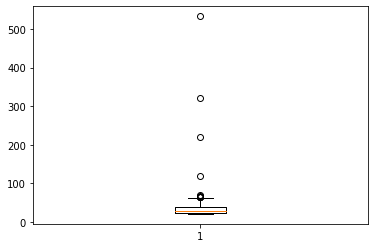

In [5]:
import matplotlib.pyplot as plt
plt.boxplot(df['나이'])

> 위의 결고를 통해 몇몇의 이상치가 존재하는 것을 눈으로 확인할 수 있다.

##4. 이상치 확인

In [8]:
import numpy as np

q1 = np.percentile(df['나이'], 25)
q3 = np.percentile(df['나이'], 75)
IQR = q3 - q1
print("q1", q1, "q3", q3, "IQR", IQR)

q1 24.0 q3 40.0 IQR 16.0


> percentile에서 여러 데이터를 얻을 경우 리스트를 이용하면 된다.

In [7]:
upperfence = q3 + IQR*3
lowerfence = q1 - IQR*1.5

> upperfence에 IQR *1.5를 적용한다면 60대 이용자도 이상치가 된다

> 이상치 판단 시 IQR의 1.5배 혹은 3배를 적용하여 처리함으로 이번에는 3배를 적용하였으며 정상적인 결과를 얻을 수 있었다.

> 최대 한계치가 구하고자 하는 데이터의 경계를 정확히 표현하는지 확인해야 한다.

{'boxes': [<matplotlib.lines.Line2D at 0x7f934e7de190>],
 'caps': [<matplotlib.lines.Line2D at 0x7f934e798050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f934e7c70d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f934ea33590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f934e83ca50>,
  <matplotlib.lines.Line2D at 0x7f934e798cd0>]}

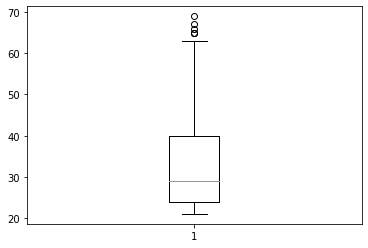

In [10]:
df = df[df['나이']<120]
plt.boxplot(df['나이'])

> 현재 차트에서 60대 이상이 이상치로 값이 나타나긴 하지만 생존이라는 개념으로 접근한다면 이상치를 사용해도 무관함